# **1. Importing the Data Set and Libraries**

In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [415]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **2. Data Dictionary**

* Survived:	0 = No, 1 = Yes
* Pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

* Sibsp:	# of siblings / spouses aboard the Titanic	
* Parch:	# of parents / children aboard the Titanic	
* Ticket:	Ticket number	
* Cabin:	Cabin number	
* Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton


# **3. Superficial Analysis**

In [416]:
train.shape[0]

891

In [417]:
test.shape[0]

418

In [418]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [419]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [420]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [421]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We can see that there is a lot of missing data in columns Cabin, Age and Embarked
There are two approaches we can make, one is to simply delete all the rows with missing data and the other is trying to replace the missing values with data that makes sense

Since there are a lot of rich data in this rows, we'll choose the latter

# **4. Analyzing the Correlation**

In [422]:
# Gender
males = train.loc[train['Sex'] == 'male']
survived_males = males.loc[train['Survived'] == 1]
s_m = survived_males['Survived'].shape[0]

females = train.loc[train['Sex'] == 'female']
survived_females = females.loc[train['Survived'] == 1]
s_f = survived_females['Survived'].shape[0]

dead_males = males.loc[train['Survived'] == 0]
d_m = dead_males['Survived'].shape[0]

dead_females = females.loc[train['Survived'] == 0]
d_f = dead_females['Survived'].shape[0]

In [423]:
gender_survived = pd.DataFrame(data={'Males':[d_m, s_m], 'Females':[d_f, s_f]})
gender_survived['Perc'] = (gender_survived['Females'] / (gender_survived['Males'] + gender_survived['Females'])).round(2)
gender_survived['Total'] = (gender_survived['Males'] + gender_survived['Females']).round(0)


gender_survived = gender_survived.T
gender_survived.columns = ['Dead', 'Survived']

gender_survived



,Dead,Survived
Males,468.00,109.00
Females,81.00,233.00
Perc,0.15,0.68
Total,549.00,342.00


With this approach, we can clearly see that females were more likely to survive than males.
This Matrix shows us that only 15% of the dead were females and the 68% that survived were females as well.


In [424]:
# Age
survived = train.loc[train['Survived'] == 1]
age_survived = pd.DataFrame(survived['Age'].describe().round(2))

dead = train.loc[train['Survived'] == 0]
age_dead = pd.DataFrame(dead['Age'].describe().round(2))

In [425]:
age_survived

,Age
count,290.00
mean,28.34
std,14.95
min,0.42
25%,19.00
50%,28.00
75%,36.00
max,80.00


In [426]:
age_dead

,Age
count,424.00
mean,30.63
std,14.17
min,1.00
25%,21.00
50%,28.00
75%,39.00
max,74.00


Comparing the age

In [427]:
# Pclass
Pclass_s = pd.DataFrame(survived.groupby(['Pclass'])['Survived'].value_counts())
s = pd.DataFrame(data=[[1, 136], [2, 87], [3, 119]], columns=['Pclass', 'Survived'])
s

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [428]:
Pclass_s = pd.DataFrame(dead.groupby(['Pclass'])['Survived'].value_counts())
d = pd.DataFrame(data=[[1, 80], [2, 97], [3, 372]], columns=['Pclass', 'Dead'])
d['Survived'] = s['Survived']
d['Fatality Rate'] = (d['Dead']/(d['Dead'] + d['Survived'])).round(2)
d

,Pclass,Dead,Survived,Fatality Rate
0,1,80,136,0.37
1,2,97,87,0.53
2,3,372,119,0.76


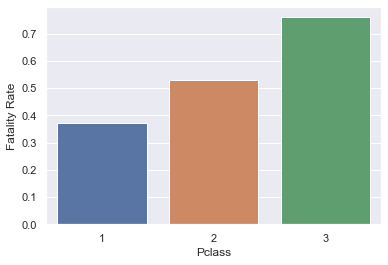

In [429]:
sns.barplot(x=d['Pclass'], y=d['Fatality Rate'])

As we can see, people that were on the cheapest class had a much smaller chance of survival

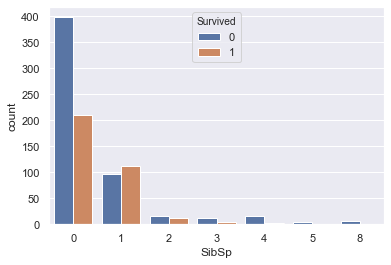

In [430]:
#SibSp
sns.countplot(x=train['SibSp'], hue=train['Survived'])

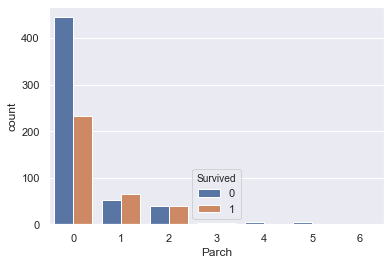

In [431]:
#Parch
sns.countplot(x=train['Parch'], hue=train['Survived'])

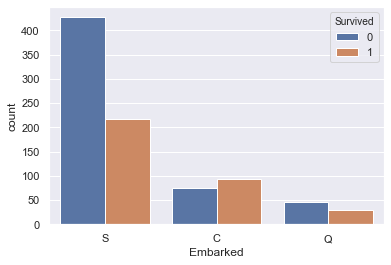

In [432]:
#Embarked
sns.countplot(x=train['Embarked'], hue=train['Survived'])

# **5. Filling the values through feature engineering**

In this process, we'll try to fill up the gaps in our data in order for the machine learning model to work

We'll do such by using statistic metrics and intuitive work in out database

In [433]:
train['Title'] = train['Name'].str.extract(' ([A-za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-za-z]+)\.', expand=False)

In [434]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Capt          1
Lady          1
Sir           1
Don           1
Countess      1
Ms            1
Mme           1
Jonkheer      1
Name: Title, dtype: int64

**Title Map:**
    Mr: 0
    Miss: 1
    Mrs: 2
    Others:3

In [435]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

In [436]:
train['Title'] = train['Title'].map(title_map)
test['Title'] = test['Title'].map(title_map)

In [437]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


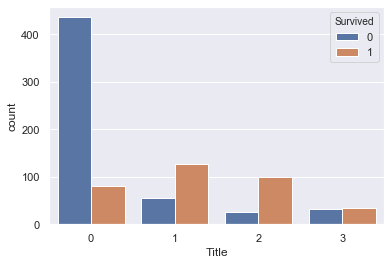

In [438]:
sns.countplot(x=train['Title'], hue=train['Survived'])

In [439]:
# As we can see, "Mr" had a high chance of dying

In [440]:
sex_map = {"male":0, "female":1}
train['Sex'] = train['Sex'].map(sex_map)
test['Sex'] = test['Sex'].map(sex_map)

In [441]:
train['Age'].fillna(train.groupby('Title')['Age'].transform("median"), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform("median"), inplace=True)

In [442]:
test['Title'] = test['Title'].fillna(3)

In [443]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

For the Age field, we succesfully filled the gaps using the categorization of the Title and Sex.

In [444]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [445]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenge

In [446]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 39.3+ KB


Here we just use a arbitrary value to fill the embarked field

In [447]:
train.loc[train['Age'] <= 16, 'Age'] = 0
train.loc[ (train['Age'] > 16) & (train['Age'] <= 26), 'Age'] = 1
train.loc[ (train['Age'] > 26) & (train['Age'] <= 36), 'Age'] = 2
train.loc[ (train['Age'] > 36) & (train['Age'] <= 62), 'Age'] = 3
train.loc[ train['Age'] > 62, 'Age'] = 4

test.loc[train['Age'] <= 16, 'Age'] = 0
test.loc[ (test['Age'] > 16) & (test['Age'] <= 26), 'Age'] = 1
test.loc[ (test['Age'] > 26) & (test['Age'] <= 36), 'Age'] = 2
test.loc[ (test['Age'] > 36) & (test['Age'] <= 62), 'Age'] = 3
test.loc[ test['Age'] > 62, 'Age'] = 4

In order to use the data for a statistic model, we have to attribute a numeric value that makes sense with the data we currently own. So, we made a small library for the Age values

In [448]:
embarked_map = {"S": 0, "C": 1, "Q": 2}
train['Embarked'] = train['Embarked'].map(embarked_map)
test['Embarked'] = test['Embarked'].map(embarked_map)

In [449]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform("median"), inplace=True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform("median"), inplace=True)

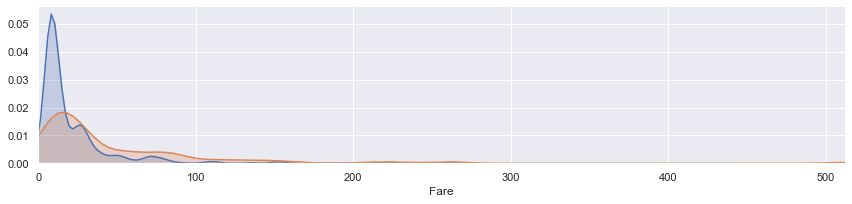

In [450]:
facet = sns.FacetGrid(train, hue="Survived", aspect = 4)
facet.map(sns.kdeplot, "Fare", shade = True)
facet.set(xlim=(0, train['Fare'].max()))

In [451]:
train.loc[train['Fare'] <= 17, 'Fare'] = 0
train.loc[ (train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1
train.loc[ (train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare'] = 2
train.loc[ train['Fare'] > 100, 'Fare'] = 4

test.loc[test['Fare'] <= 17, 'Fare'] = 0
test.loc[ (test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1
test.loc[ (test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2
test.loc[ test['Fare'] > 100, 'Fare'] = 4


In [452]:
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

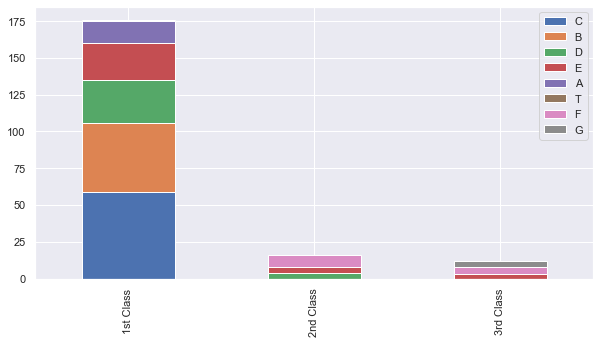

In [453]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st Class', '2nd Class', '3rd Class']
df.plot(kind='bar', stacked = True, figsize=(10,5))

In [454]:
cabin_map = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G": 2.4, "T":2.8}
train['Cabin'] = train['Cabin'].map(cabin_map)
test['Cabin'] = test['Cabin'].map(cabin_map)

In [455]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform("median"), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform("median"), inplace=True)

In [456]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0


In [457]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

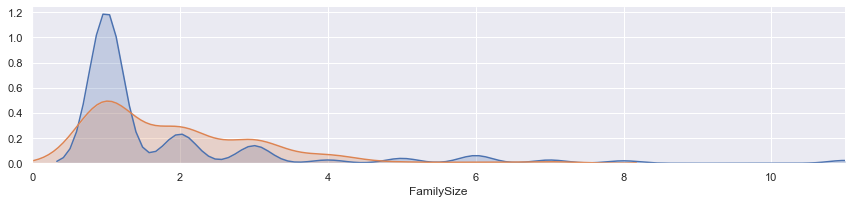

In [458]:
facet = sns.FacetGrid(train, hue='Survived', aspect=4)
facet.map(sns.kdeplot, "FamilySize", shade = True)
facet.set(xlim=(0, train['FamilySize'].max()))

In [459]:
family_map = {1: 0, 2: 0.4, 3:0.8, 4:1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
train['FamilySize'] = train['FamilySize'].map(family_map)
test['FamilySize'] = test['FamilySize'].map(family_map)

In [460]:
train = train.drop(['Ticket', 'SibSp', 'Parch', 'PassengerId', 'Name'], axis=1)
test = test.drop(['Ticket', 'SibSp', 'Parch', 'Name'], axis=1)

In [461]:
train_data = train.drop('Survived', axis=1)
target_train = train['Survived']

In [462]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


# **6. Machine Learning Section**

In this section, we'll first choose the best model for the train dataset. For that, we will use some models described below and check their score.

In [463]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [464]:
##6.1 Cross Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#Here we choose to split the dataset into 10 parts in order to build the algorithm


In [465]:
##6.1.1 kNN Method
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

81.82

In [466]:
##6.1.2 Decision Tree
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)


79.8

In [467]:
##6.1.3 Random Forest
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)

81.6

In [468]:
##6.1.4 Naive Bayes
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100, 2)


78.44

In [469]:
##6.1.4 SVM
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target_train, cv=k_fold, n_jobs=1, scoring=scoring)
round(np.mean(score)*100,2)

83.5

# **7. Testing**

In [470]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Cabin        418 non-null    float64
 6   Embarked     418 non-null    int64  
 7   Title        418 non-null    float64
 8   FamilySize   418 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [471]:
clf = SVC()
clf.fit(train_data, target_train)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [472]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [473]:
submission = pd.read_csv('submission.csv')
submission.head()


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
